# #CiènciaParticipativa: Taller de datos sobre alojamientos turísticos

## Grupo Mango: Victòria, Pau, Francisco, Pablo


En una reunión a finales de mayo de 2018, Airbnb se comprometió a retirar 2.577 anuncios de pisos ilegales que había denunciado el Ayuntamiento de Barcelona. Aseguraron que a partir del 1 de junio ya no estarían publicados en su página web. 

**Noticias** 

- [La Vanguardia: Barcelona y Airbnb se dan una tregua con la retirada de 2.577 anuncios ilegales](https://www.lavanguardia.com/local/barcelona/20180529/443933421052/ayuntamiento-tregua-airbnb-retirada-anuncios-pisos-ilegales.html)
- [RTVE: Airbnb elimina este verano más de 3.000 pisos turísticos ilegales en Barcelona a petición del Ayuntamiento](http://www.rtve.es/noticias/20180902/airbnb-elimina-este-verano-mas-3000-pisos-turisticos-ilegales-barcelona-peticion-del-ayuntamiento/1790241.shtml)
- [Hostel Sur: Airbnb dará datos de los anfitriones al Ayuntamiento de Barcelona](https://www.hosteltur.com/128348_airbnb-dara-datos-anfitriones-al-ayuntamiento-barcelona.html)


**Pregunta** *¿Se eliminaron más anuncios de AirBnB desde el pacto entre la plataforma y el ayuntamiento de Mayo de 2018?*


Para responder a esta pregunta se utilizan los anuncios mensuales de Inside Airbnb.

In [1]:
import numpy as np
import pandas as pd

from dateutil import parser
from dateutil.relativedelta import relativedelta
from datetime import datetime

%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,6]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10

## Número de anuncios a lo largo del tiempo

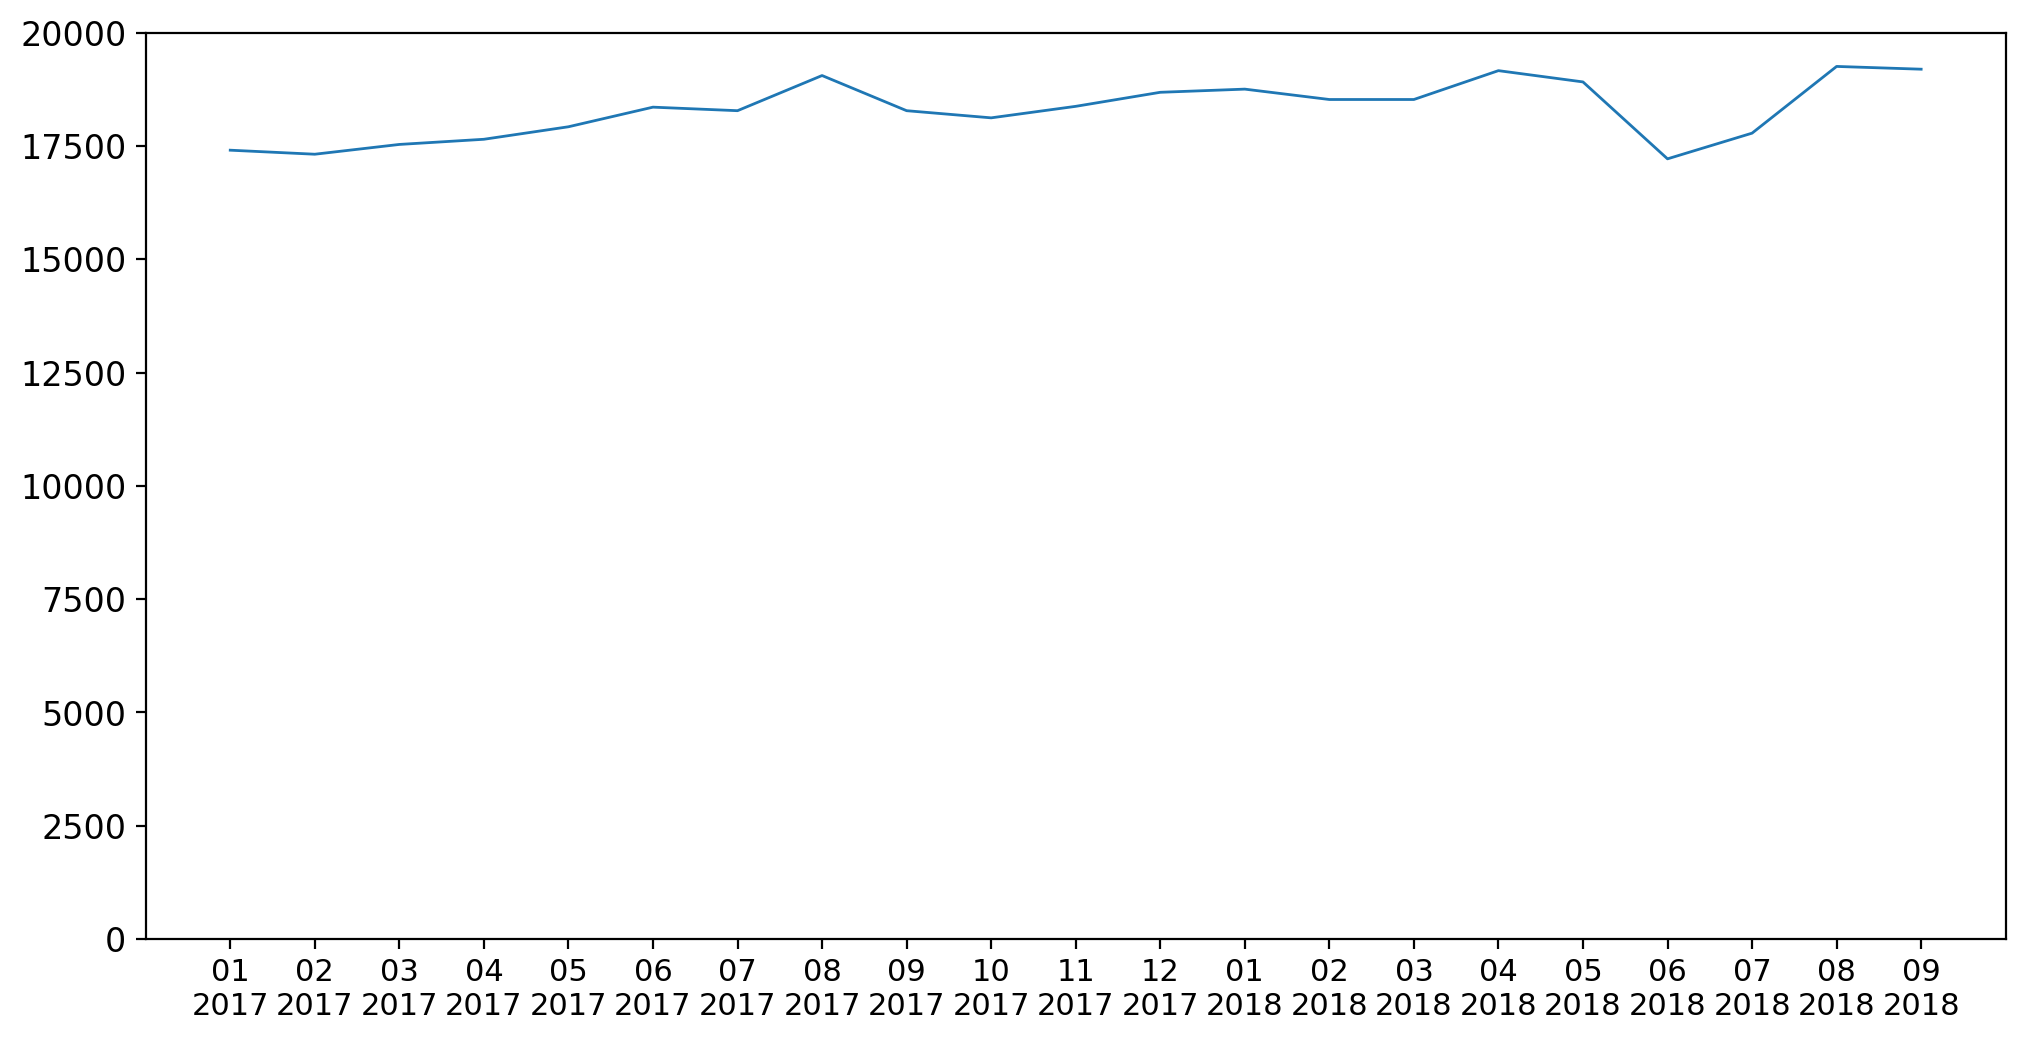

In [2]:
start_date = "2016-12-01"
stop_date = "2018-09-01"

start = datetime.strptime(start_date, "%Y-%m-%d")
stop = datetime.strptime(stop_date, "%Y-%m-%d")

path = 'data/'+start.strftime('%Y-%m')+'.csv'
df_airbnb = pd.read_csv(path, sep=',')
last_month_ids = df_airbnb.id.values


# Data
months = []
listings = []

while start < stop:
    start = start + relativedelta(months=+1)
    month = start.strftime('%Y-%m')
    path = 'data/'+month+'.csv'
    try:
        df_airbnb = pd.read_csv(path, sep=',')
    except:
        pass
    months.append(start.strftime('%m\n%Y'))
    listings.append(df_airbnb.shape[0])


fig = plt.figure(figsize=(12,6)) 
ax = fig.add_subplot(111)
line, = ax.plot(np.arange(len(listings)), listings, '-', linewidth=1)
plt.xticks(range(len(months)), months, fontsize=11)
plt.ylim(0,20000)
plt.show()

## Anuncios añadidos y borrados cada mes con respecto al mes anterior

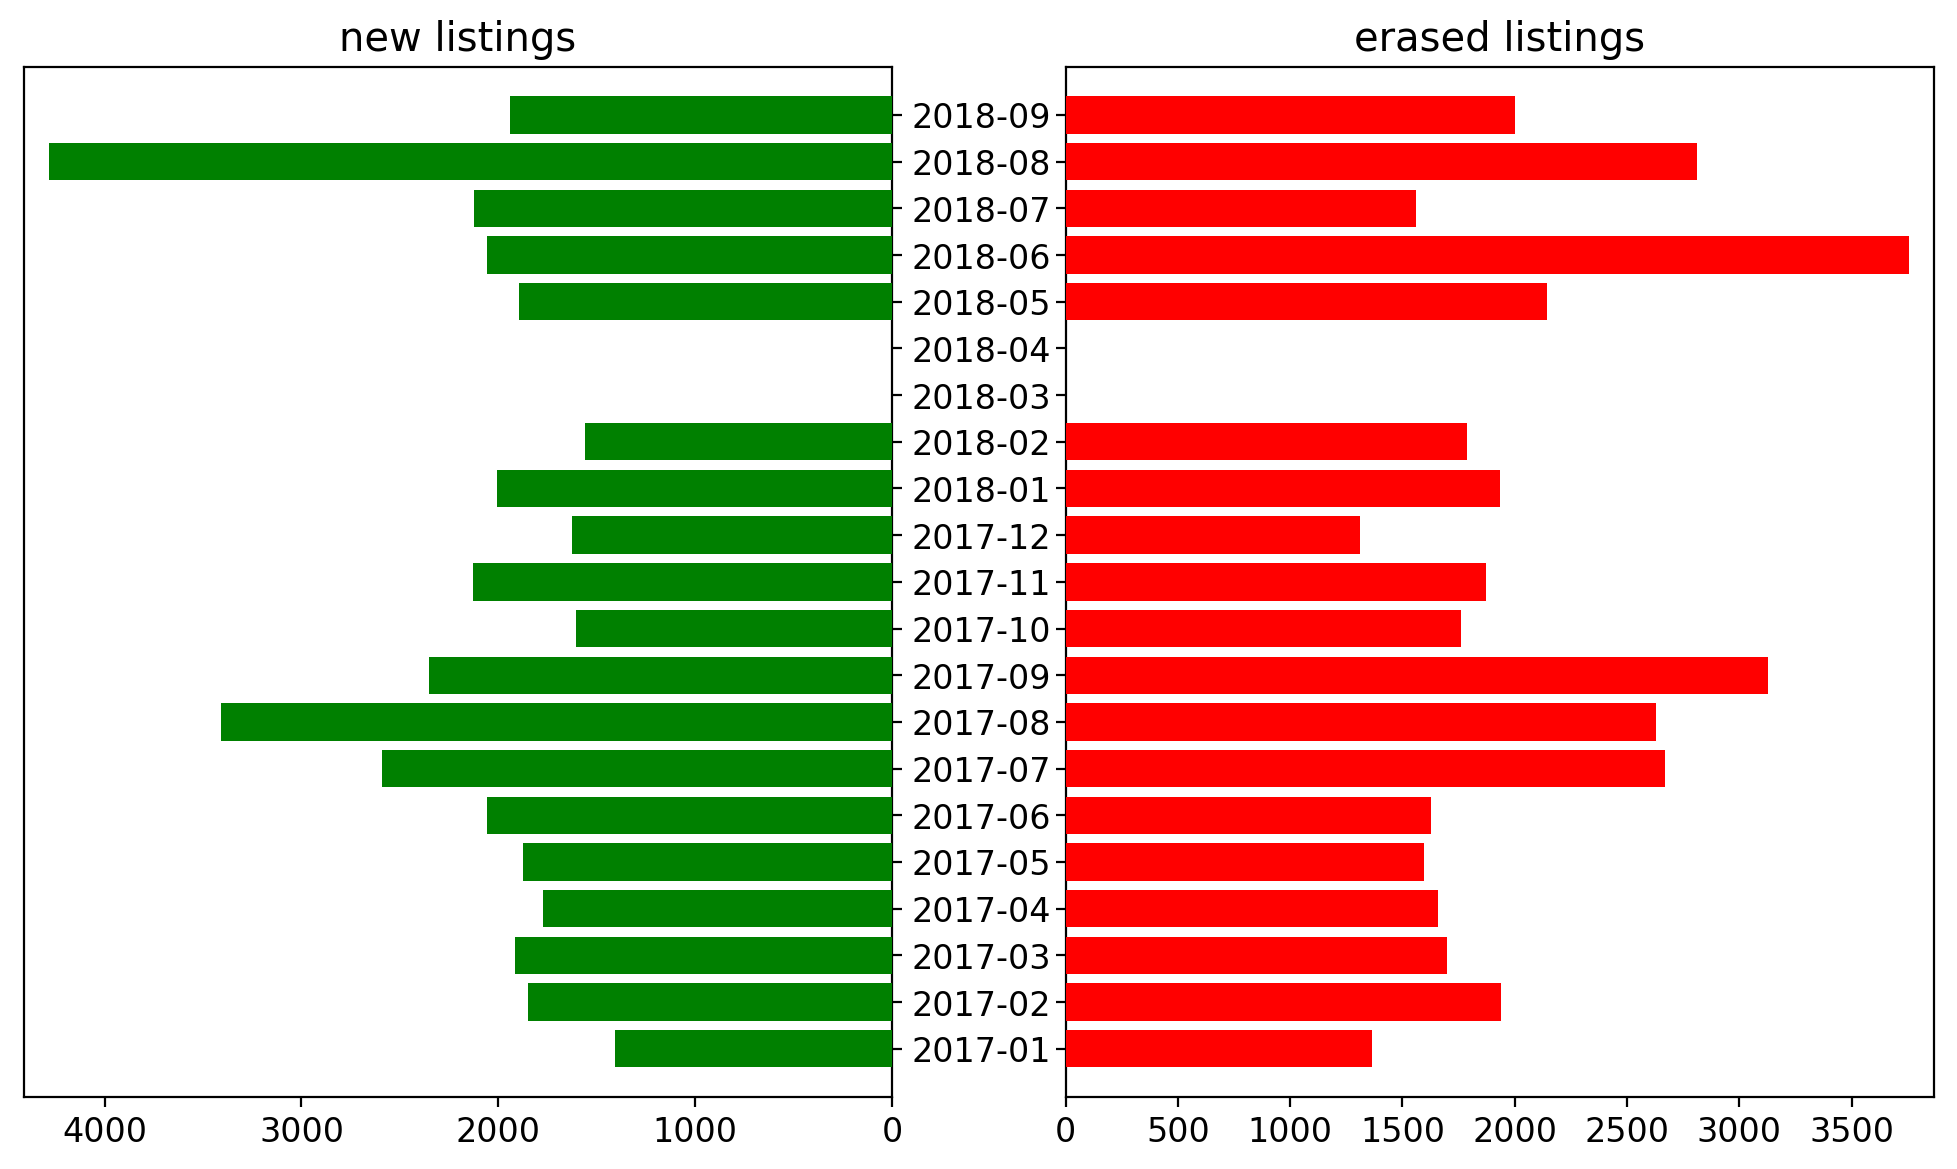

In [3]:
start_date = "2016-12-01"
stop_date = "2018-09-01"

start = datetime.strptime(start_date, "%Y-%m-%d")
stop = datetime.strptime(stop_date, "%Y-%m-%d")

path = 'data/'+start.strftime('%Y-%m')+'.csv'
df_airbnb = pd.read_csv(path, sep=',')
last_month_ids = df_airbnb.id.values


# Data
months = []
new_listings = []
erased_listings = []

while start < stop:
    start = start + relativedelta(months=+1)
    month = start.strftime('%Y-%m')
    path = 'data/'+month+'.csv'
    try:
        df_airbnb = pd.read_csv(path, sep=',')
    except:
        pass
    current_month_ids = df_airbnb.id.values
    intersect = np.intersect1d(last_month_ids, df_airbnb.id.values)
    months.append(month)
    if month != '2018-04':
        new_listings.append(len(current_month_ids) - len(intersect))
        erased_listings.append(len(last_month_ids) - len(intersect))
    else:
        new_listings.append(0)
        erased_listings.append(0)
    last_month_ids = current_month_ids
    
new_listings = np.array(new_listings)
erased_listings = np.array(erased_listings)    
    
y = np.arange(erased_listings.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, new_listings, align='center', color='green', zorder=10)
axes[0].set(title='new listings')
axes[1].barh(y, erased_listings, align='center', color='red', zorder=10)
axes[1].set(title='erased listings')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=months)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=0.2)
plt.show()    

## Balance de anuncios a lo largo del tiempo (añadidos - borrados)

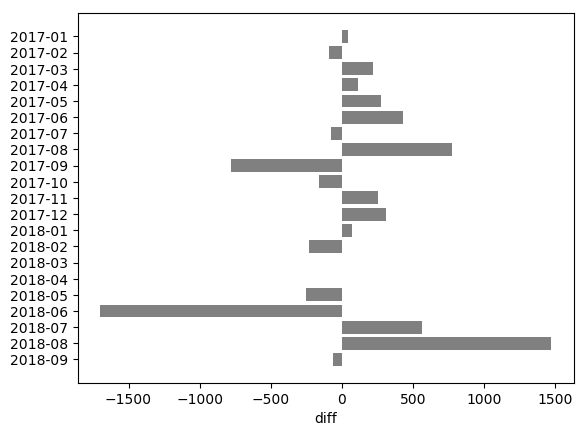

In [4]:
start_date = "2016-12-01"
stop_date = "2018-09-01"

start = datetime.strptime(start_date, "%Y-%m-%d")
stop = datetime.strptime(stop_date, "%Y-%m-%d")

path = 'data/'+start.strftime('%Y-%m')+'.csv'
df_airbnb = pd.read_csv(path, sep=',')
last_month_ids = df_airbnb.id.values


# Data
months = []
performance = []

while start < stop:
    start = start + relativedelta(months=+1)
    month = start.strftime('%Y-%m')
    path = 'data/'+month+'.csv'
    try:
        df_airbnb = pd.read_csv(path, sep=',')
    except:
        pass
    current_month_ids = df_airbnb.id.values
    intersect = np.intersect1d(last_month_ids, df_airbnb.id.values)
    months.append(month)
    if month != '2018-04':
        performance.append((len(current_month_ids) - len(intersect))-(len(last_month_ids) - len(intersect))            )
    else:
        performance.append(0)
    last_month_ids = current_month_ids
    
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(months))
ax.barh(y_pos, performance, align='center', color='gray', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(months)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('diff')

plt.show()

## Número de anuncios borrados en junio de 2018 según tipo de host

/home/pablo.aragon/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))


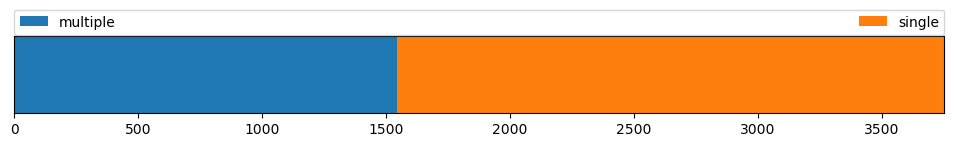

In [5]:
df_erased_listings_2018_06_airbnb = pd.read_csv('data/erased_listings_2018-06.csv', sep=',')
single = [df_erased_listings_2018_06_airbnb[df_erased_listings_2018_06_airbnb.calculated_host_listings_count==1].id.shape[0]]
multiple = [df_erased_listings_2018_06_airbnb[df_erased_listings_2018_06_airbnb.calculated_host_listings_count>1].id.shape[0]]
df = pd.DataFrame({'single' : single,'multiple' : multiple})
ax = df.plot.barh(stacked=True);
ax.figure.set_size_inches(12,1)
plt.yticks(range(0), [])
plt.ylim(0,0)
plt.xlim(0,df_erased_listings_2018_06_airbnb.shape[0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

## Porcentaje de anuncios publicados en agosto de 2017 que fueron borrados un mes después

In [6]:
df_new_listings_2017_08_airbnb = pd.read_csv('data/new_listings_2017-08.csv', sep=',')
df_erased_listings_2017_09_airbnb = pd.read_csv('data/erased_listings_2017-09.csv', sep=',')
print 1.0 * len(np.intersect1d(df_new_listings_2017_08_airbnb.id, df_erased_listings_2017_09_airbnb.id)) / len(df_new_listings_2017_08_airbnb.id)

0.36014088641


## Código para generar los ficheros de anuncios creados y borrados en cada mes
El objetivo de estos ficheros es el de poder usarlos luego en QGIS. También se genera un fichero agregando ambos y añadiendo la columna *diff_type* con valores *new* o *erased*

In [7]:
start_date = "2016-12-01"
stop_date = "2018-09-01"

start = datetime.strptime(start_date, "%Y-%m-%d")
stop = datetime.strptime(stop_date, "%Y-%m-%d")

path = 'data/'+start.strftime('%Y-%m')+'.csv'
df_last_month_airbnb = pd.read_csv(path, sep=',')
last_month_ids = df_last_month_airbnb.id.values

# Data
months = []
new_listings = []
erased_listings = []

while start < stop:
    start = start + relativedelta(months=+1)
    month = start.strftime('%Y-%m')
    if month != '2018-04' and month != '2018-03':
        path = 'data/'+month+'.csv'
        df_current_month_airbnb = pd.read_csv(path, sep=',')
        current_month_ids = df_current_month_airbnb.id.values
        intersect = np.intersect1d(last_month_ids, current_month_ids)

        df_last_month_airbnb[df_last_month_airbnb.id.isin(np.setdiff1d(last_month_ids,intersect))].to_csv('data/erased_listings_'+month+'.csv', sep=',', encoding='utf-8')
        df_current_month_airbnb[df_current_month_airbnb.id.isin(np.setdiff1d(current_month_ids,intersect))].to_csv('data/new_listings_'+month+'.csv', sep=',', encoding='utf-8')

        df_erased = df_last_month_airbnb[df_last_month_airbnb.id.isin(np.setdiff1d(last_month_ids,intersect))]
        df_erased.insert(len(df_erased.columns), 'diff_type', 'erased')
        df_new = df_current_month_airbnb[df_current_month_airbnb.id.isin(np.setdiff1d(current_month_ids,intersect))]
        df_new = df_new.insert(len(df_new.columns), 'diff_type', 'new')
        pd.concat([df_erased,df_new]).to_csv('data/diff_'+month+'.csv', sep=',', encoding='utf-8')
        
        df_last_month_airbnb = pd.read_csv(path, sep=',')
        last_month_ids = df_last_month_airbnb.id.values